# **Hackathon Subject 1: Credit Card Fraud Detection And Prevention**

# ***Description***

The dataset includes anonymized features resulting from a PCA dimensionality reduction process to protect sensitive information. Your task will involve exploring these features, understanding their relationships, and building predictive models to enhance the institution’s fraud detection capabilities.

From the datasource page we have: linkcode Introduction The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation.

Due to confidentiality issues, there are not provided the original features and more background information about the data.

Features V1, V2, ... V28 are the principal components obtained with PCA; The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [31]:
# Import librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [22]:
# data load and preprocessing

df = pd.read_csv('creditcard.csv')
df.info()
df.head()

# # or alternativer using Kaggle:
# from google.colab import files
# files.upload()
# 'new cell'
# !cp kaggle.json ~/.kaggle/
# 'new'
# !chmod 600 ~/.kaggle/kaggle.json
# !mkdir -p ~/.kaggle
# # 1. Créer le dossier cible
# !mkdir -p /content/credit_card_fraud_detection
# # 2. Télécharger le dataset depuis Kaggle
# !kaggle datasets download -d mlg-ulb/creditcardfraud -p /content/credit_card_fraud_detection
# # 3. Décompresser le fichier ZIP dans le même dossier
# !unzip /content/credit_card_fraud_detection/creditcardfraud.zip -d /content/credit_card_fraud_detection
# # 4. Vérifier le contenu extrait
# !ls /content/credit_card_fraud_detection (modifié)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 1 - Exploratory Data Analysis (EDA)

**Time**: Number of seconds elapsed between this transaction and the first transaction in the dataset

**Columns V21 to V28**: Anonymized features resulting from an ACP dimensionality reduction process to protect sensitive information.

**Amount**: Transaction amount

**Class**: This is our target, which takes the value 1 for fraudulent transactions and 0 otherwise

In [23]:
print("\n--- Initial Data Exploration ---")
print(df.info())
print("\nClass Distribution (The Imbalance Problem):")
print(df['Class'].value_counts())
print(f"Fraud Rate: {df['Class'].value_counts()[1] / df.shape[0] * 100:.4f}%")

print('-'*30)
print(df.duplicated().sum())


--- Initial Data Exploration ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807

Observations:
* Size of the dataset : 31 Columns anbd 284807 lines
* Clean dataset with numeric values only
* unbalanced dataset with obnly 492 fraud (0.17%)
* showing 1081 duplicates lines


In [24]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [25]:
df.shape

(284807, 31)

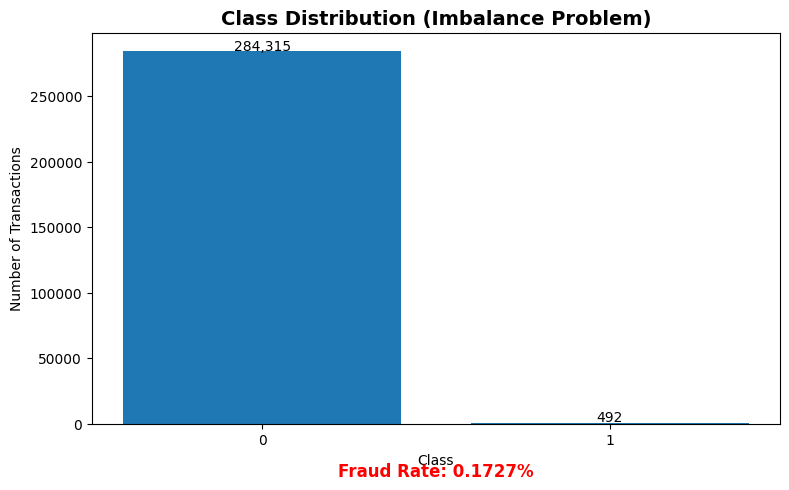

In [26]:
# Visualization of Imbalance


# Sample data
data = {'Class': [0, 1], 'Count': [284315, 492]}
data = pd.DataFrame(data)

# Compute fraud rate
fraud_rate = data.loc[data['Class'] == 1, 'Count'].values[0] / data['Count'].sum() * 100

# --- Bar chart ---
plt.figure(figsize=(8, 5))
plt.bar(data['Class'].astype(str), data['Count'])
plt.title('Class Distribution (Imbalance Problem)', fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')

# Annotate counts
for i, val in enumerate(data['Count']):
    plt.text(i, val + 1000, f'{val:,}', ha='center', fontsize=10)

# Display fraud rate below chart
plt.text(0.5, -40000, f'Fraud Rate: {fraud_rate:.4f}%',
         ha='center', fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()

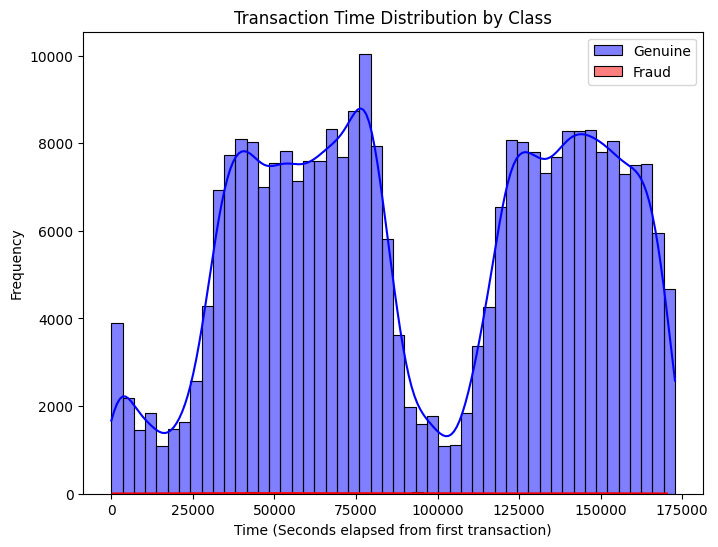

In [27]:
# Visualization of Time vs. Class
plt.figure(figsize=(8, 6))

# Plotting the 'Time' feature for genuine transactions (Class 0)
sns.histplot(df[df['Class'] == 0]['Time'], bins=50, color='blue', label='Genuine', kde=True)
# Overlaying the 'Time' feature for fraudulent transactions (Class 1)
sns.histplot(df[df['Class'] == 1]['Time'], bins=50, color='red', label='Fraud', kde=True)

plt.title('Transaction Time Distribution by Class')
plt.xlabel('Time (Seconds elapsed from first transaction)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

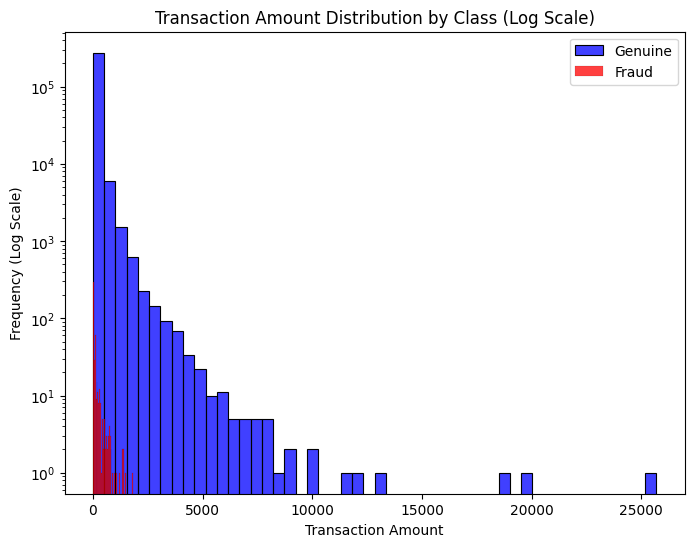

In [28]:
# Visualization of Amount vs. Class

plt.figure(figsize=(8, 6))

# Plotting the 'Amount' feature for genuine transactions (Class 0)
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, color='blue', label='Genuine', kde=False)
# Overlaying the 'Amount' feature for fraudulent transactions (Class 1)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=False)

plt.yscale('log') # Set the y-axis to a logarithmic scale
plt.title('Transaction Amount Distribution by Class (Log Scale)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency (Log Scale)')
plt.legend()
plt.show()

# 2 - Data Preprocessing

In [29]:
# Cleaning Values

# Number of duplicates before cleaning
print(f"# Number of duplicates before cleaning {df.duplicated().sum()}")
# delete duplicates
df.drop_duplicates(inplace=True)
print(f"# Number of duplicates after cleaning : {df.duplicated().sum()}")


# Number of duplicates before cleaning 1081
# Number of duplicates after cleaning : 0


In [32]:
# normalization or standardization techniques
# as a PCA has been done on the dataset only TIme and Amount need a normalization

# Split features and Target
X = df.drop('Class', axis=1) # Features
y = df['Class']             # Target

# Standardization

scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

# Applying Smote to balance the "Class"
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)
# X_res and y_res are now balanced and ready for modelization
